# Practical Exam - University Enrollment

## Instructions
- Use Python or R to perform the tasks required.
- Write your solutions in the workspace provided from your certification page.
- Include all of the visualizations you create to complete the tasks.
- Visualizations must be visible in the published version of the workspace. Links to external visualizations will not be accepted.
- You do not need to include code unless the question says you must.
- You must pass all criteria to pass this exam. The full criteria can be found here.

## Background
You are working as a data scientist at a local University.
The university started offering online courses to reach a wider range of students.
The university wants you to help them understand enrollment trends.
They would like you to identify what contributes to higher enrollment. In particular, whether
the course type (online or classroom) is a factor.

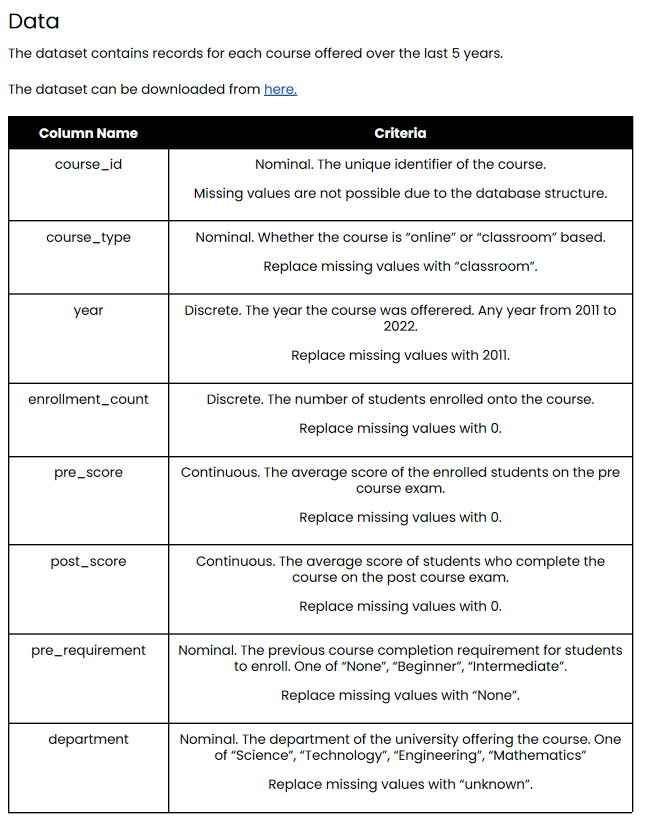

## Tasks
Write your answers in your workspace.

1. For every column in the data:
    a. State whether the values match the description given in the table above.
    b. State the number of missing values in the column.
    c. Describe what you did to make values match the description if they did not match.
2. Describe the distribution of the enrollment counts. Your answer must include a visualization that shows the distribution.
3. Create a visualization that shows how many courses were of each type. Use the visualization to:
    a. State which type of course has the most observations
    b. Explain whether the observations are balanced across the types.
4. Describe the relationship between course type and the enrollment count. Your answer must include a visualization to demonstrate the relationship.
5. The university wants to predict how many students will enroll in a course. State the type of machine learning problem that this is (regression/ classification/ clustering).
6. Fit a baseline model to predict how many students will enroll using the data provided. You must include your code.
7. Fit a comparison model to predict how many students will enroll using the data provided. You must include your code.
8. Explain why you chose the two models used in parts 6 and 7.
9. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.
10. Explain which model performs better and why.

# Solution

## Task 1

1. For every column in the data:
    
    a. State whether the values match the description given in the table above.

    b. State the number of missing values in the column.
    
    c. Describe what you did to make values match the description if they did not match.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in college enrollment data with course_id column as object
df = pd.read_csv('datasets/university_enrollment_2306.csv', dtype={'course_id': 'object'})

In [67]:
df.info()
# Missing values in 'post_score' and 'pre_requirement' columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   object 
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 115.8+ KB


In [68]:
df['course_id'].value_counts()

0001    1
1243    1
1241    1
1240    1
1239    1
       ..
0614    1
0613    1
0612    1
0611    1
1850    1
Name: course_id, Length: 1850, dtype: int64

### Cleaning the data to match the description

In [69]:
# Inspecting the missing values for 'pre_score'
df['pre_score'].value_counts()

# Inspecting the missing values for 'post_score'
df['pre_score'] = df['pre_score'].replace('-', '0')

# Convert pre_score to float
df['pre_score'] = df['pre_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   object 
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 115.8+ KB


In [70]:
# replacing missing values in 'post_score' with 0
df['post_score'] = df['post_score'].fillna(0)
# check if there are any missing values left
# df['post_score'].isnull().sum()

# replacing missing values in 'pre_requirement' with 'None'
df['pre_requirement'] = df['pre_requirement'].fillna('None')
# check if there are any missing values left
# df['pre_requirement'].isnull().sum()

# convert 'Math' category to 'Mathematics' in 'department' column
df['department'] = df['department'].replace('Math', 'Mathematics')
# check if the category names are OK
# df['department'].value_counts()

## Task 1 answer (columns in order):

### Columns:
- <code>'course_id'</code>:
    - (a) nominal because each course has a unique ID (matches the description)
    - (b) no missing values, as described in PDF. 
    - (c) I loaded this variable as object into pandas dataframe. Otherwise pandas would convert it to integer. In any case this variable is irrelevant for the model.

- <code>'course_type'</code>:
    - (a) matches the description.
    - (b) no missing values.
    - (c) no need to take action.

- <code>'year'</code>:
    - (a) matches the description. It is a discrete variable, cannot be broken into decimal or fraction values.
    - (b) no missing values.
    - (c) no need to take action.

- <code>'enrollment_count'</code>:
    - (a) matches the description. It is a discrete variable, cannot be broken into decimal or fraction values.
    - (b) no missing values.
    - (c) no need to take action.

- <code>'pre_score'</code>:
    - (a) does not match the description due to dashes ("-") in column - pandas loaded it as object dtype.
    - (b) dashes have to be treated as missing values. There are 130 missing values (dashes)
    - (c) The PDF instructs to replace missing values with 0. I replaced '-' with '0' using <code>replace</code>, and converted to 'float' using <code>astype</code>

- <code>'post_score'</code>:
    - (a) matches the description - it is a continuous variable. 
    - (b) there are 185 missing values (checked with <code>df['post_score'].isna().sum()</code>)
    - (c) as in the description, I replaced missing values with 0 using <code>fillna(0)</code>

- <code>'pre_requirement'</code>:
    - (a) matches the description - it is a nominal variable.
    - (b) there are 89 missing values (checked with <code>df['pre_requirement'].isna().sum()</code>)
    - (c) as in the description, I replaced missing values with "None" using <code>fillna('None')</code>

- <code>'department'</code>:
    - (a) the the variable type is OK (nominal), but there are 5 categories instead of 4 as in the description
    - (b) no missing values
    - (c) I converted the 'Math' category into 'Mathematics' using <code>replace('Math', 'Mathematics')</code> to match the description

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   object 
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 115.8+ KB


## Task 2

Describe the distribution of the enrollment counts. Your answer must include a visualization that shows the distribution.

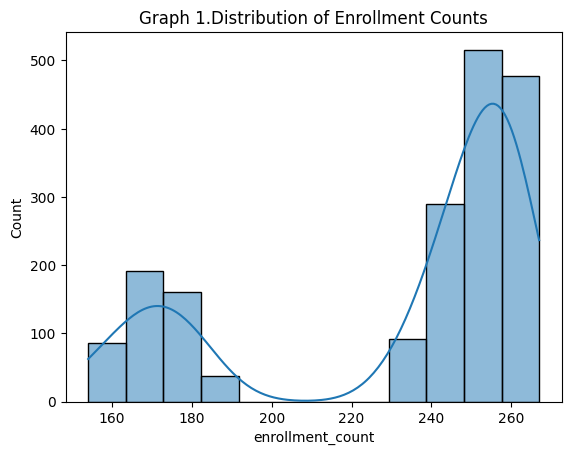

In [72]:
# Plot the distribution of the enrollment counts
plt.title("Graph 1.Distribution of Enrollment Counts")
sns.histplot(df['enrollment_count'], kde=True)
plt.show()

In [73]:
df['enrollment_count'].describe()

count    1850.000000
mean      231.565405
std        36.987029
min       154.000000
25%       185.000000
50%       251.000000
75%       261.000000
max       267.000000
Name: enrollment_count, dtype: float64

## Task 2 answer:

- The distribution of the enrollment counts is bimodal meaning it has two peaks.
- The minimum number of students per course is 154 and the maximum is 267.
- Although the mean number of students per course is 231.5, the distribution has majority of the courses have two centers of accumulated student counts:
    - The first (smaller) peak's mean ranges from about 165 to 170 students and there are about 200 courses with such student count.
    - The second (higher) peak's mean mean ranges from about 248 to 255 students and tuere are slightly over 500 courses with such student count. 

## Task 3

3. Create a visualization that shows how many courses were of each type. Use the visualization to:
    
    a. State which type of course has the most observations
    
    b. Explain whether the observations are balanced across the types.

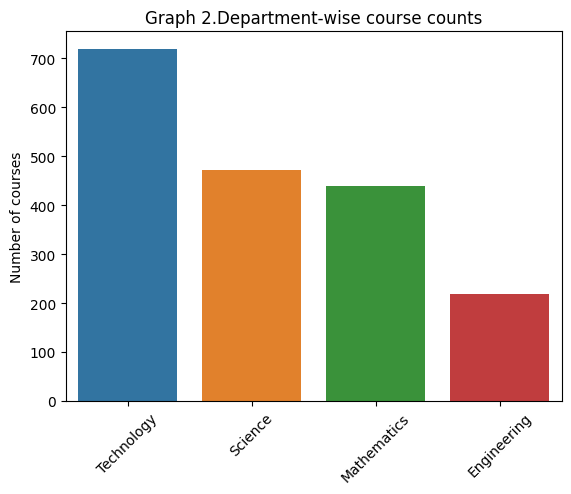

In [74]:
# Group and sort the data by department
df_by_dept = df.groupby('department').count().sort_values('course_id', ascending=False)

# plot df_by_dept
plt.title("Graph 2.Department-wise course counts")
sns.barplot(x=df_by_dept.index, y=df_by_dept['course_id'])
plt.xticks(rotation=45)
# rename the axes
plt.xlabel("")
plt.ylabel("Number of courses")
plt.show() 

## Task 3 answer:
- Most courses fall into the Technology category.
- The number of Science and Mathematics courses is roughly equal.
- The number of Engineering courses is the smallest among all the departments.

Considering all the above, the department-wise counts of courses are not balanced (except for Science and Mathematics). 

## Task 4

4. Describe the relationship between course type and the enrollment count. Your answer must include a visualization to demonstrate the relationship.

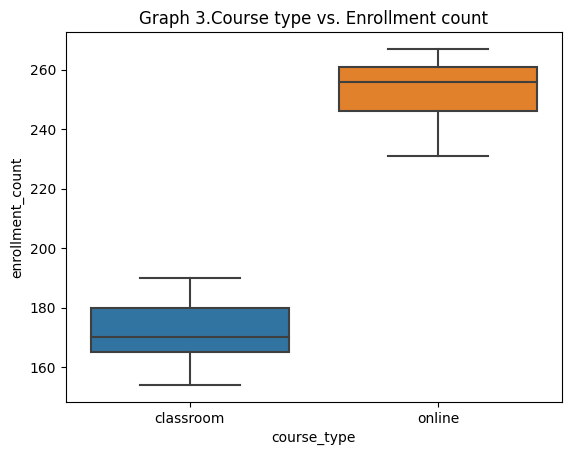

In [75]:
# plot the relationship between the course type and the enrollment_count
plt.title("Graph 3.Course type vs. Enrollment count")
sns.boxplot(x=df['course_type'], y=df['enrollment_count'])
plt.show()

In [76]:
count_by_type = df.groupby('course_type').agg({'enrollment_count': ['count', 'mean', 'median', 'min', 'max']})
count_by_type

enrollment_count                             
                       count        mean median  min  max
course_type                                              
classroom                475  170.429474  170.0  154  190
online                  1375  252.685091  256.0  231  267

## Task 4 answer:
- Graph 3 indicates that, on average, more people are enrolled to the online courses than classroom courses, with median of 256 and 170, respectively.
- In addition, the count_by_type table above shows that there are a lot more online courses available (1375 online, 475 classroom).
- The smallest audiences in online courses, are still bigger than the largest audiences in the classroom courses. This may indicate that online courses as a whole can be more profitable for the university (tuition plays a role too, so we cannot be sure). 

## Task 5

5. The university wants to predict how many students will enroll in a course. State the type of machine learning problem that this is (regression/ classification/ clustering).

## Task 5 answer:
The university wants to predict the number of students who will enroll in a course. 

This is a <b>regression</b> problem because the target variable - 'enrollment_count' is a <b>discrete variable</b> (number of students) and not a nominal variable, like for example 'course_type'. If we were to predict 'course_type' this would be a classification problem.

Since the target variable follows a bimodal distribution, I will explore if a <b>polynomial regression</b> model captures the non-linear patterns in data.

I will also check if DecisionTree and Random Forrest aren't a better solution.

## Task 6

6. Fit a baseline model to predict how many students will enroll using the data provided. You must include your code.

In [77]:
df.columns

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department'],
      dtype='object')

In [78]:
# Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the predictors; get_dummies()
predictors = df[['course_type', 'pre_requirement', 'department']]
predictors_dummies = pd.get_dummies(predictors)

# Concatenating and dropping to get the dataset ready for the model
df_model = pd.concat([df, predictors_dummies], axis=1)
df_model = df_model.drop(['course_id', 'course_type', 'pre_requirement', 'department'], axis=1)
df_model.head()

,year,enrollment_count,pre_score,post_score,course_type_classroom,course_type_online,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,department_Science,department_Technology
0,2018,165,28.14,73.0,1,0,1,0,0,0,0,1,0
1,2020,175,79.68,86.0,1,0,0,0,1,0,0,1,0
2,2016,257,57.24,80.0,0,1,0,0,1,0,1,0,0
3,2013,251,97.67,75.0,0,1,1,0,0,0,0,0,1
4,2019,165,39.75,76.0,1,0,1,0,0,0,0,1,0


In [79]:
# Creating X and y variables
X = df_model.drop('enrollment_count', axis=1)

y = df_model['enrollment_count']
# print(y)

In [80]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the baseline model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# make predictions on the test set
y_pred_linreg = linreg.predict(X_test)

# Calculate the training error and test error
train_error = mean_squared_error(y_train, linreg.predict(X_train), squared=False)
test_error = mean_squared_error(y_test, linreg.predict(X_test), squared=False)

print("Training RMSE: {}\nTest RMSE: {}".format(train_error, test_error))

Training RMSE: 0.32840173142314755
Test RMSE: 0.3148932080267509


In [81]:
# Create polynomial features
degree = 2  # Choose the degree of polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)

# Fit the polynomial features to linear regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Transform test data using the same polynomial features
X_test_poly = poly_features.transform(X_test)

# Predict the target variable on the test data
y_pred = poly_model.predict(X_test_poly)

# Calculate the training error and test error
train_error_poly = mean_squared_error(y_train, poly_model.predict(X_train_poly), squared=False)
test_error_poly = mean_squared_error(y_test, poly_model.predict(X_test_poly), squared=False)

print("Training RMSE: {}\nTest RMSE: {}".format(train_error_poly, test_error_poly))

Training RMSE: 0.32393876228825835
Test RMSE: 0.32002284644464785


In [82]:
# import decisionTree Regressor 
from sklearn.tree import DecisionTreeRegressor

# I want to perform a grid search to find the best hyperparameters for DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['absolute_error'],  # Splitting criterion
    'max_depth': [6, 8, 10, 12, 14],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [3, 4, 5, 6, 7],  # Minimum number of samples required to be at a leaf node
    'max_features': [1.0],  # Number of features to consider when looking for the best split
}

# Create a DecisionTreeRegressor instance
tree = DecisionTreeRegressor()

# Perform grid search using cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

Best Parameters:  {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score:  0.11567567567567569


In [83]:
# Predict the target variable on the test data using the best model
y_pred_tree = grid_search.best_estimator_.predict(X_test)

# Calculate the training error and test error
train_error_tree = mean_squared_error(y_train, grid_search.best_estimator_.predict(X_train), squared=False)
test_error_tree = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared=False)

print("Training RMSE: {}\nTest RMSE: {}".format(train_error_tree, test_error_tree))

Training RMSE: 0.33991254837169593
Test RMSE: 0.31622776601683794


## Task 6 conclusions
Polynomial transformation did not result in a better preformance of the model if compared with normal LinearRegression.

DecisionTreeRegressor has a similar RMSE to LinearRegression.

Given the above, I will stick with linreg model for the baseline model.

## Task 7

7. Fit a comparison model to predict how many students will enroll using the data provided. You must include your code.

In [84]:
# import a random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor instance
rf = RandomForestRegressor()

# Define the grid of parameters
params_rf = {'n_estimators': [300, 400, 500, 600],
             'max_features': [1.0],
             'max_depth': [3,4,5,6,7,8],
             'min_samples_leaf': [1,2,3,4,5,6]}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)


# Perform grid search using cross-validation
grid_rf.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_rf.best_params_)
print("Best Score: ", -grid_rf.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters:  {'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 2, 'n_estimators': 400}
Best Score:  0.11972219638699687


In [85]:
# use the best model to predict the target variable on the test data
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# Calculate the training error and test error
train_error_rf = mean_squared_error(y_train, grid_rf.best_estimator_.predict(X_train), squared=False)
test_error_rf = mean_squared_error(y_test, grid_rf.best_estimator_.predict(X_test), squared=False)

print("Training RMSE: {}\nTest RMSE: {}".format(train_error_rf, test_error_rf))

Training RMSE: 0.3048556719784609
Test RMSE: 0.2839204205184642


## Task 8

8. Explain why you chose the two models used in parts 6 and 7.

## Task 8 answer:
For both parts regression models were selected because university wants to predict the number of students who will enroll in a course and 'enrollment_count' is a <b>continuous variable</b>, and the data are labelled.

#### Part 6
In part 6, I fitted several models to compare their prerformance taking into account that the target variable follows a <b>bimodal distribution</b>. The first model I fitted was <b>LinearRegression</b>, however since Linear Regression is a linear model that assumes a linear relationship between the independent variables and the target variable, I chose to see if <b>polynomial transformation</b> could improve the predictions. I tested several polynomial degree values but the performance was still worst if compared to standard linear regression. Finally, I decided to try <b>DecisionTreeRegressor</b> as a final model fitted in part 6. Again, the performance was similar to linear regression, so I sticked with <b>LinearRegression</b> model as the baseline model.

#### Part 7
In part 7, I fitted a <b>RandomForrestRegressor</b> which is an ensemble model that combines multiple decision trees to make predictions. It can capture non-linear relationships and interactions between features effectively. Given that the bimodal distribution of enrollment count appears to be influenced by the 'course_type' variable, I decided that Random Forest Regressor could be a suitable choice due to its ability to handle complex relationships. In addition, I performed a GridSearchCV to select the best hyperparameters for the model.

## Task 9

9. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.



In [86]:
# compare linreg test rmse and random forest test rmse
print("Linear Regression Test RMSE: {}\nRandom Forest Test RMSE: {}".format(test_error, test_error_rf))

Linear Regression Test RMSE: 0.3148932080267509
Random Forest Test RMSE: 0.2839204205184642


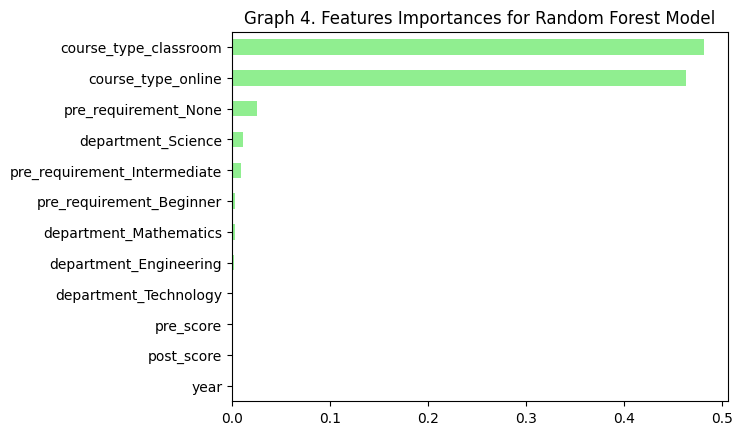

In [87]:
# Create a pd.Series of features importances for rf model
importances_rf = pd.Series(data=grid_rf.best_estimator_.feature_importances_, index= X_train.columns)

# Sort importances for rf model
importances_rf_sorted = importances_rf.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_rf_sorted.plot(kind='barh', color='lightgreen')
plt.title('Graph 4. Features Importances for Random Forest Model')
plt.show()

In [88]:
# Show the coefficients for the linear regression model and their names
pd.Series(data=np.abs(linreg.coef_), index=X_train.columns).sort_values(ascending=False)

course_type_online              38.017653
course_type_classroom           38.017653
pre_requirement_None            10.011179
pre_requirement_Intermediate    10.007041
department_Science               7.509070
department_Engineering           7.502142
department_Technology            2.422348
department_Mathematics           2.415421
year                             0.007262
pre_requirement_Beginner         0.004138
post_score                       0.000394
pre_score                        0.000019
dtype: float64

## Task 9 answer:

The metric used to compare the two models is RMSE. RMSE is considered to be the roof of the average squared distance between the predicted values and true values. The RMSE for <b>RandomForrestRegressor</b> is lower.

## Task 10

10. Explain which model performs better and why.

## Task 10 answer:

The RMSE for <b>RandomForrestRegressor</b> is lower, indicating that the average prediction error for that model is lower. RMSE is an ensemble model that combines multiple decision trees to make predictions. It is more complex and can capture non-linear relationships and interactions between features effectively. 

The first graph indicated a strong relationship between course type and enrollment count. Furthermore, the feature importance analysis confirmed that the most important features include online and classroom course type. Given the bimodal distribution of enrollment count, RandomForrestRegressor is a more suitable choice due to its ability to handle complex relationships. In addition, it allows for the hyperparameter tuning, whereas for LinearRegression only data transformation is possible (I tried polynomial transformation but it did not improve the performance).